In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

Dataset was downloaded from Kaggle.com (https://www.kaggle.com/c/digit-recognizer/overview/tutorial). Main goal was to classify a gray-scale images of hand-drawn digits (0-9) to a proper label. 

Description of data from Kaggle: "Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive".

In [21]:
digits=pd.read_csv('train.csv')

In [22]:
digits.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
isna=digits.isna().sum()
isna.value_counts()

0    785
dtype: int64

There are no null values.

<H3> Visualizing examplary samples</H3>

In [24]:
X = digits.iloc[:,1:]
Y = digits.iloc[:,0:1]

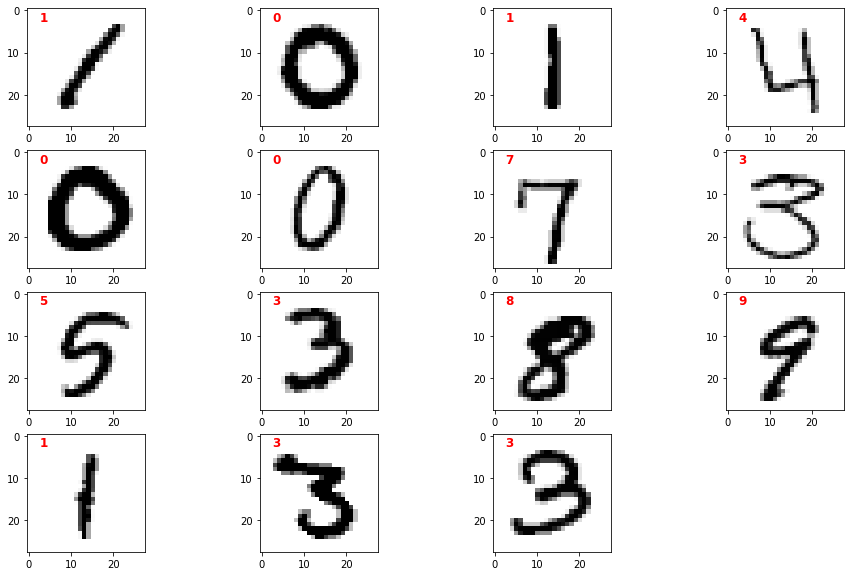

In [25]:
plt.figure(figsize=(16,10))

for i in range(15):

    labels=Y.iloc[i]
    label=np.array(labels, dtype='int')[0]
    pixels = X.iloc[i,:]
    pixels = np.array(pixels, dtype='float')
    image = pixels.reshape((28, 28))

    
    plt.subplot(4,4,i+1)
    plt.imshow(image, cmap='gray_r')
    plt.text(x=2.5, y=2.5, s=str(label), color='red', fontsize='large', fontweight='bold')
plt.show()

<H3> Testing dataset balance </H3> 

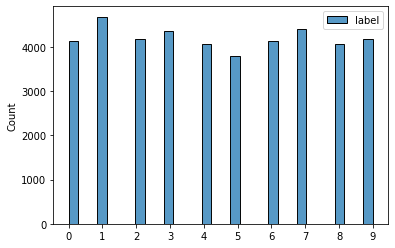

In [26]:
ax=plt.subplot()
sns.histplot(Y)
ax.set_xticks([x for x in range(10)])
ax.set_xticklabels([x for x in range(10)])
plt.show()

- All categories are roughly equal. There is no need to use balancing methods.

<H3> Train/validation split </H3>

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.8, random_state=42)

In [28]:
input_shape=[X_train.shape[1]]  #input dimension - number of columns (features) of dataset

<H3>Normalizing pixel values</H3>

- pixel-value is an integer between 0 and 255, inclusive,
- therefore it is neccessary to normalize the data.

In [29]:
Xs_train=X_train/255
Xs_val=X_val/255

<H3> Deep learning model </H3>

In [30]:
model = keras.Sequential([
    #layers.BatchNormalization(), #data normalization
    #hidden layer
    layers.Dense(units=64, activation='relu', input_shape=input_shape),  #hidden layer with 64 nodes activated usind ReLU function: max(0,x)
    #goutput layer
    layers.Dense(units=10, activation='softmax'),   # softmax - a generalization of the logistic function to multiple dimension 
                                                    #10 output nodes - because there are 10 digits (10 classification possibilities)
])

Model is validated and optimized using:
- a loss function that measures how good the network's predictions are,
- an optimizer that can tell the network how to change the weights.

In [31]:
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

Stochastic gradient descent is an iterative algorithm. 

One step of training:
- Sample some training data (batch_size) and run it through the network to make predictions.
- Measure the loss between the predictions and the true values.
- Finally, adjust the weights (learning rate) in a direction that makes the loss smaller.


In [32]:
history = model.fit(
    Xs_train, Y_train,
    validation_data=(Xs_val, Y_val),
    batch_size=2100,
    epochs=30,
    verbose=0, 
)

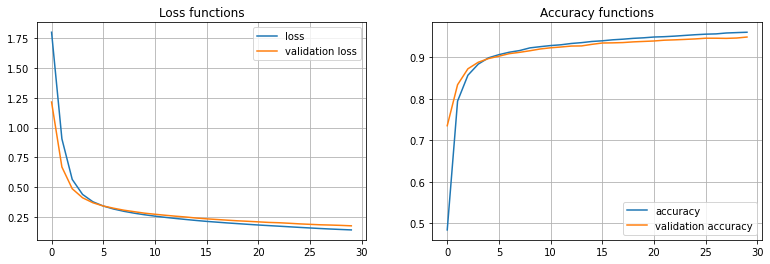

Best Loss: 0.1432
Best Accuracy: 0.9609
Best Validation Loss: 0.1775
Best Validation Accuracy: 0.9493


In [33]:
history_df=history.history
plt.figure(figsize=(13,4))
ax0=plt.subplot(1,2,1)
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])
plt.title('Loss functions')
plt.legend(['loss', 'validation loss'])
plt.grid(axis='both')
ax1=plt.subplot(1,2,2)
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])
plt.title('Accuracy functions')
plt.legend(['accuracy', 'validation accuracy'])
plt.grid(axis='both')
plt.show()

print(("Best Loss: {:0.4f}" +\
      "\nBest Accuracy: {:0.4f}")\
      .format(min(history_df['loss']), 
              max(history_df['accuracy'])))

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(min(history_df['val_loss']), 
              max(history_df['val_accuracy'])))

<H3> Comparison of predictions</H3>

In [34]:
model_pred=model.predict(Xs_val)
print(model_pred.round(2))

[[0.   0.   0.02 ... 0.   0.98 0.  ]
 [0.   0.99 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.01 0.   0.98]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.99 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.98]]


In [35]:
y_pred = np.argmax(model_pred, axis=1)
y_pred

array([8, 1, 9, ..., 3, 0, 9])

In [36]:
Y_val.head()

,label
5457,8
38509,1
25536,9
31803,9
39863,8


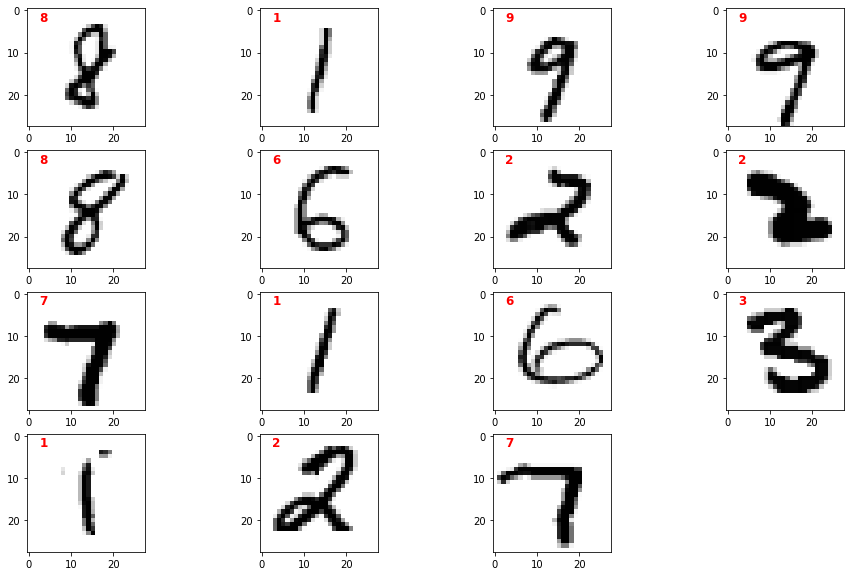

In [37]:
plt.figure(figsize=(16,10))

for i in range(15):

    labels=Y_val.iloc[i]
    label_predicted=np.array(labels, dtype='int')[0]
    pixels = Xs_val.iloc[i,:]
    pixels = np.array(pixels, dtype='float')
    image = pixels.reshape((28, 28))

    
    plt.subplot(4,4,i+1)
    plt.imshow(image, cmap='gray_r')
    plt.text(x=2.5, y=2.5, s=str(label_predicted), color='red', fontsize='large', fontweight='bold')
plt.show()